## Allstate Claim Prediction

### Goal of this activity:
**To better predict Bodily Injury Liability Insurance claim payments based on the characteristics of the insured customer’s vehicle.**

## Table of Contents
- [Loading dataset & checking high-level details](#Step-1:-Loading-Dataset-and-Checking-details) <br>
- [Data Dictionary](#Data-Dictionary)
- [EDA](#EDA)
- [Data Cleaning](#Data-Cleaning)
- [Feature Engineering](#Feature-Engineering)


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
pd.pandas.set_option('display.max_column', None)

In [2]:
from google.colab import drive
drive.mount('/content/driver')

Mounted at /content/driver


### Loading Dataset and Checking details
The training data consists of observations from years - 2005 to 2007.


In [3]:
df_claimpred = pd.read_csv('/content/driver/MyDrive/Capstone_Code_DB_GoogleCoLab/DataSets/sample_final.csv', index_col='Row_ID', low_memory=False)
df_claimpred.head()

,Household_ID,Vehicle,Calendar_Year,Model_Year,Blind_Make,Blind_Model,Blind_Submodel,Cat1,Cat2,Cat3,Cat4,Cat5,Cat6,Cat7,Cat8,Cat9,Cat10,Cat11,Cat12,OrdCat,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var8,NVCat,NVVar1,NVVar2,NVVar3,NVVar4,Claim_Amount
Row_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
48,16,3,2006,2005,X,X.38,X.38.0,C,C,A,C,A,B,?,A,B,A,F,B,4,-0.392708,0.394228,0.426171,0.316372,-0.210252,-0.275857,-1.021362,-0.188486,N,-0.23153,2.783616,-0.272337,-0.251419,24.205590
102,39,1,2006,2001,BH,BH.18,BH.18.5,B,C,F,A,A,B,C,A,B,A,F,C,2,-0.665897,-0.816152,-0.823407,-0.749192,-0.198358,-0.650165,-0.861623,-0.527934,B,-0.23153,2.783616,2.715490,-0.251419,2.624877
155,76,5,2005,2001,AJ,AJ.48,AJ.48.1,D,C,A,?,?,D,?,A,B,A,B,D,5,2.130275,0.826507,1.629469,1.162057,2.067504,1.162886,1.374723,0.452562,H,-0.23153,1.563723,-0.272337,2.404670,7.036577
212,103,1,2005,1995,AR,AR.41,AR.41.1,B,?,A,A,A,C,C,A,B,B,A,B,2,-0.754282,-1.680709,-1.101091,-1.679445,-0.971487,-1.405797,-0.837048,-1.193267,H,-0.23153,-0.266117,5.105752,-0.251419,8.432544
352,179,1,2005,1995,AJ,AJ.76,AJ.76.2,D,?,C,?,?,E,?,A,B,B,A,C,5,3.456046,0.307772,1.606328,0.400940,2.626535,1.360567,1.423873,-0.479145,M,-0.23153,-0.266117,-0.272337,-0.251419,89.927240


In [4]:
df_claimpred.shape

(95605, 34)

In [5]:
df_claimpred.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95605 entries, 48 to 13183953
Data columns (total 34 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Household_ID    95605 non-null  int64  
 1   Vehicle         95605 non-null  int64  
 2   Calendar_Year   95605 non-null  int64  
 3   Model_Year      95605 non-null  int64  
 4   Blind_Make      95605 non-null  object 
 5   Blind_Model     95605 non-null  object 
 6   Blind_Submodel  95605 non-null  object 
 7   Cat1            95605 non-null  object 
 8   Cat2            95605 non-null  object 
 9   Cat3            95605 non-null  object 
 10  Cat4            95605 non-null  object 
 11  Cat5            95605 non-null  object 
 12  Cat6            95605 non-null  object 
 13  Cat7            95605 non-null  object 
 14  Cat8            95605 non-null  object 
 15  Cat9            95605 non-null  object 
 16  Cat10           95605 non-null  object 
 17  Cat11           95605 non-n

### Data Dictionary



**Independent Features:**   

- `Row_ID:` Index column
- `Household_ID:` Unique identifier for each household
- `Vehicle:` Unique identifier for each vehicle within a household
- `Calendar_Year:` Calendar year during which vehicle was insured (not blinded)
- `Model_Year:` Model year of vehicle (not blinded)
- `Blind_Make:` Vehicle make (example: ACME, coded A)
- `Blind_Model:` Vehicle model (example: ACME Roadster, coded A.1)
- `Blind_Submodel:` Vehicle submodel (example: ACME Roadster LS, coded A.1.1).  For the base model--e.g. no suffix after the model name--submodel is coded as 0
- `Cat1:` Categorical vehicle variable
- `Cat2:` Categorical vehicle variable
- `Cat3:` Categorical vehicle variable
- `Cat4:` Categorical vehicle variable
- `Cat5:` Categorical vehicle variable
- `Cat6:` Categorical vehicle variable
- `Cat7:` Categorical vehicle variable
- `Cat8:` Categorical vehicle variable
- `Cat9:` Categorical vehicle variable
- `Cat10:` Categorical vehicle variable
- `Cat11:` Categorical vehicle variable
- `Cat12:` Categorical vehicle variable
- `OrdCat:` Ordered categorical vehicle variable
- `Var1:` Continuous vehicle variable, mean 0 stdev 1
- `Var2:` Continuous vehicle variable, mean 0 stdev 1
- `Var3:` Continuous vehicle variable, mean 0 stdev 1
- `Var4:` Continuous vehicle variable, mean 0 stdev 1
- `Var5:` Continuous vehicle variable, mean 0 stdev 1
- `Var6:` Continuous vehicle variable, mean 0 stdev 1
- `Var7:` Continuous vehicle variable, mean 0 stdev 1
- `Var8:` Continuous vehicle variable, mean 0 stdev 1
- `NVCat:` Categorical non-vehicle variable
- `NVVar1:` Continuous non-vehicle variable, mean 0 stdev 1
- `NVVar2:` Continuous non-vehicle variable, mean 0 stdev 1
- `NVVar3:` Continuous non-vehicle variable, mean 0 stdev 1
- `NVVar4:` Continuous non-vehicle variable, mean 0 stdev 1

**Target Feature:**  
- `Claim_Amount`: Non-negative real number, 99% zeros on the training set

In above list of features all of with `Continuous vechical and non-vehical` has "mean" = 0 and "stdev" = 1, that refersthat the data in these features is standardization. So there is no need to standardize data before feeding to model.

### EDA
Steps involved in explotery data analysis:
- Missing values and their impact on Target feature
- All features with Numerical values and their distribution
- All categorical features and their Cardinality
- Outliers
- Relation between independent and dependent features

#### Missing values and their impact on Target feature

In [ ]:
# Features with missing values with it's percentages
missing_feature = [feature for feature in df_claimpred.columns if (df_claimpred[feature].isnull().sum() > 0) or (df_claimpred[feature].isna().sum() > 0)]

for col in missing_feature:
    print(f"{col} has {round(df_claimpred[col].isnull().mean(),4)} % of missing values")

Cat12 has 0.0019 % of missing values


Since we found single column with few missing values, now we can check it's relationship with target feature

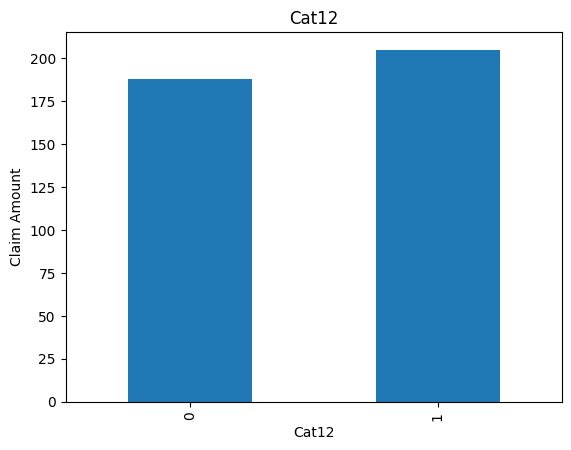

In [ ]:
# Finding out impact of missing values on Target feature
# To check the same let's replace missing value with 1 and rest with 0, this will hepl in grouping target features values with respect to missing and non-missing values
for col in missing_feature:
    df_copy = df_claimpred.copy()

    df_copy[col] = np.where(df_claimpred[col].isnull(),1,0)

    plt.figure()
    df_copy.groupby(col)['Claim_Amount'].mean().plot(kind='bar')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('Claim Amount')
    plt.show()


**In the above chart, the relationship between missing values in Cat12 with target features is visible, and the majority portion of target features is dependent on missing values rather than non-missing values, so we need to replace these with meaningful values.**



> Indented block



#### After handling of null values now we can move to find out all features with Numerical values and their distribution.

In [ ]:
# find all numerical features
num_features = df_claimpred.select_dtypes('number').columns

In [ ]:

print(f"Total numerical features are : {len(num_features)}.\nBellow are the numeric features with 5 records:")
df_claimpred.select_dtypes('number').head()

Total numerical features are : 17.
Bellow are the numeric features with 5 records:


,Household_ID,Vehicle,Calendar_Year,Model_Year,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var8,NVVar1,NVVar2,NVVar3,NVVar4,Claim_Amount
Row_ID,,,,,,,,,,,,,,,,,
48,16,3,2006,2005,-0.392708,0.394228,0.426171,0.316372,-0.210252,-0.275857,-1.021362,-0.188486,-0.23153,2.783616,-0.272337,-0.251419,24.205590
102,39,1,2006,2001,-0.665897,-0.816152,-0.823407,-0.749192,-0.198358,-0.650165,-0.861623,-0.527934,-0.23153,2.783616,2.715490,-0.251419,2.624877
155,76,5,2005,2001,2.130275,0.826507,1.629469,1.162057,2.067504,1.162886,1.374723,0.452562,-0.23153,1.563723,-0.272337,2.404670,7.036577
212,103,1,2005,1995,-0.754282,-1.680709,-1.101091,-1.679445,-0.971487,-1.405797,-0.837048,-1.193267,-0.23153,-0.266117,5.105752,-0.251419,8.432544
352,179,1,2005,1995,3.456046,0.307772,1.606328,0.400940,2.626535,1.360567,1.423873,-0.479145,-0.23153,-0.266117,-0.272337,-0.251419,89.927240


**Among all numerical features first feature, 'Household_ID', represents a unique value for each household.
And second feature 'Vehicle' represents a unique value for each vehicle in each household.**
Let's analyze further in 'Household_ID' and 'Vehicle' features, by checking...


1.   Unique values in each features
2.   Repeated values in Household_ID feature
3.   To check similarity in other features for same Household_ID

In [ ]:
# 1. Unique values in each features
for dcol in ['Household_ID','Vehicle']:
    print(f"Unique values for '{dcol}' = {len(df_claimpred[dcol].unique())}, out of {df_claimpred.shape[0]} total observations.")

Unique values for 'Household_ID' = 93189, out of 95605 total observations.
Unique values for 'Vehicle' = 15, out of 95605 total observations.


In [ ]:
# 2. Repeated values in Household_ID feature
df_claimpred.groupby('Household_ID')['Vehicle'].count().sort_values(ascending=False)

Household_ID
2621167    4
6964877    4
6028243    4
2565956    4
244389     3
          ..
2634656    1
2634636    1
2634626    1
2634617    1
7541843    1
Name: Vehicle, Length: 93189, dtype: int64

There are few household_ids having multuple rows, so will few of them for further analysis..
- 2621167
- 6964877
- 6028243
- 2565956
- 244389

In [ ]:
# To check Household_ID 2621167, for understanding relation with respect to other features
df_claimpred[df_claimpred['Household_ID'] == 2621167]

,Household_ID,Vehicle,Calendar_Year,Model_Year,Blind_Make,Blind_Model,Blind_Submodel,Cat1,Cat2,Cat3,Cat4,Cat5,Cat6,Cat7,Cat8,Cat9,Cat10,Cat11,Cat12,OrdCat,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var8,NVCat,NVVar1,NVVar2,NVVar3,NVVar4,Claim_Amount
Row_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
4202451,2621167,1,2005,2003,AJ,AJ.40,AJ.40.2,I,C,A,?,?,B,?,A,A,C,A,B,4,0.137601,0.394228,0.009645,0.316372,-0.097257,0.817822,1.067532,0.403881,O,-0.23153,-0.266117,-0.272337,-0.251419,5.772474
4202452,2621167,1,2006,2003,AJ,AJ.40,AJ.40.2,I,C,A,?,?,B,?,A,A,A,C,D,4,0.137601,0.394228,0.009645,0.316372,-0.097257,0.817822,1.067532,0.403881,O,-0.23153,-0.266117,-0.272337,-0.251419,1.107532
4202453,2621167,1,2007,2003,AJ,AJ.40,AJ.40.2,I,C,A,?,?,B,?,A,A,B,D,B,4,0.137601,0.394228,0.009645,0.316372,-0.097257,0.817822,1.067532,0.403881,O,-0.23153,-0.266117,-0.272337,-0.251419,3.739490
4202456,2621167,2,2007,1999,Y,Y.9,Y.9.1,F,C,A,C,A,C,?,B,B,A,C,B,2,-0.633757,-1.248430,-0.777126,-1.290430,-0.620605,-1.173025,-1.193388,-0.998437,O,-0.23153,-0.266117,-0.272337,-0.251419,14.033810


In [ ]:
df_claimpred[df_claimpred['Household_ID'] == 2602734]

,Household_ID,Vehicle,Calendar_Year,Model_Year,Blind_Make,Blind_Model,Blind_Submodel,Cat1,Cat2,Cat3,Cat4,Cat5,Cat6,Cat7,Cat8,Cat9,Cat10,Cat11,Cat12,OrdCat,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var8,NVCat,NVVar1,NVVar2,NVVar3,NVVar4,Claim_Amount
Row_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
4143783,2602734,1,2007,1994,AU,AU.11,AU.11.2,B,?,E,A,A,B,C,A,B,A,A,D,4,-0.617687,-0.470329,-0.638284,-0.529313,-0.210252,-0.493423,-0.935349,-0.077013,M,-0.23153,-0.266117,-0.272337,-0.251419,3.076448
4143784,2602734,3,2007,2007,K,K.61,K.61.2,I,A,B,?,?,C,?,C,A,B,A,B,4,-0.585547,1.414405,-0.129197,1.314280,-0.596817,-0.167074,0.440864,-0.000875,M,-0.23153,-0.266117,-0.272337,-0.251419,12.168610


Observations for Household_id 2621167 there are 4 rows, out of 4 first 3 are having same values in
- madel_year, make, model, and submode (identifies unique vehicle)
- as well as values in Cat1 to Cat9 are having same values (may be more information about the same vehicle)
- OrdCat also has same values in all rows (may be more information about the same vehicle)
- Cat10 to Cat12 has different values (may be information about incident, for which claim has been raised)
- Var1 to Var 8 and NVCat has same values (may be more information about the same vehicle)
- NVVar1 to NVVar4 having same in all 4 observations (seems these features provides information about each household)

In [ ]:
# To check Household_ID 6028243, for understanding relation with respect to other features
df_claimpred[df_claimpred['Household_ID'] == 6028243]

,Household_ID,Vehicle,Calendar_Year,Model_Year,Blind_Make,Blind_Model,Blind_Submodel,Cat1,Cat2,Cat3,Cat4,Cat5,Cat6,Cat7,Cat8,Cat9,Cat10,Cat11,Cat12,OrdCat,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var8,NVCat,NVVar1,NVVar2,NVVar3,NVVar4,Claim_Amount
Row_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
9176799,6028243,3,2007,2007,D,D.7,D.7.0,D,C,A,?,?,D,?,A,B,A,A,D,5,2.130275,1.950431,1.583188,1.838605,1.942614,2.022623,1.325572,1.760363,N,2.054683,-0.266117,-0.272337,-0.251419,47.60996
9176800,6028243,4,2007,2006,AJ,AJ.64,AJ.64.1,D,A,A,?,?,E,?,A,B,A,A,C,5,3.552466,0.826507,1.814591,2.261447,3.239091,2.737316,1.817077,0.685570,N,2.054683,-0.266117,-0.272337,-0.251419,74.32036
9176801,6028243,5,2006,2007,AI,AI.20,AI.20.0,J,C,B,?,?,D,?,B,A,A,B,D,5,0.322405,3.731419,1.606328,3.580716,0.675872,2.531447,1.473024,3.760627,M,-0.231530,-0.266117,-0.272337,-0.251419,160.99020
9176802,6028243,9,2007,2005,BO,BO.52,BO.52.1,D,A,A,?,?,D,?,A,B,A,A,C,4,0.683979,0.394228,1.814591,0.400940,0.985124,1.117268,1.509886,-0.011815,N,2.054683,-0.266117,-0.272337,-0.251419,164.59740


Observations for Household_id 6028243 there are 4 observations, out of 4
- Each observations madel_year, make, model and submode are having different values (seems each row represents different vehicle)
- Cat1 to Cat9, OrdCat, Cat10 to Cat12 and  Var1 to Var 8 and NVCat are having different values (information about each vehicle and each incident of each vehicle)
- NVVar1 having different values in all 4 rows
- NVVar2 to NVVar4 are having the same values (seems these features provides information about each household)

In [ ]:
# To check Household_ID 244389, for understanding relation with respect to other features
df_claimpred[df_claimpred['Household_ID'] == 244389]

,Household_ID,Vehicle,Calendar_Year,Model_Year,Blind_Make,Blind_Model,Blind_Submodel,Cat1,Cat2,Cat3,Cat4,Cat5,Cat6,Cat7,Cat8,Cat9,Cat10,Cat11,Cat12,OrdCat,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var8,NVCat,NVVar1,NVVar2,NVVar3,NVVar4,Claim_Amount
Row_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
323388,244389,1,2006,2000,AJ,AJ.129,AJ.129.3,G,C,A,A,C,E,A,A,B,A,A,B,4,0.700049,0.221317,0.726996,0.147235,0.580718,0.354617,0.354851,-0.096595,H,-0.231530,-0.266117,3.313055,-0.251419,24.47565
323398,244389,4,2007,1997,M,M.16,M.16.1,B,?,A,A,A,C,C,B,B,A,B,B,2,-0.770352,-1.507798,-1.239933,-1.544135,-0.846597,-1.480659,-1.009074,-0.934551,H,1.140198,-0.266117,1.520359,-0.251419,161.66280
323401,244389,6,2005,1997,M,M.16,M.16.1,B,?,A,A,A,C,C,B,B,B,E,E,2,-0.770352,-1.507798,-1.239933,-1.544135,-0.846597,-1.480659,-1.009074,-0.934551,H,-0.231530,-0.266117,3.313055,-0.251419,73.20847


Observations for Household_id 244389:
There are 3 rows, out of 3
- second and third rows are having same
    - madel_year
    - make
    - model and
    - submode
    - Cat1 to Cat9 are having same values
    - OrdCat has same values
    - Cat10 to Cat12 has different values
    - in Var1 to Var 8 and NVCat has same values
- NVVar1 to NVVar4 having the same in first and third rows and is different in second row compared to first and third
(may be values in these non-vehicle columns provides information about policy (or about policyholder may be) within the same household.

In [ ]:
# To check Household_ID 6964877, for understanding relation with respect to other features
df_claimpred[df_claimpred['Household_ID'] == 6964877]

,Household_ID,Vehicle,Calendar_Year,Model_Year,Blind_Make,Blind_Model,Blind_Submodel,Cat1,Cat2,Cat3,Cat4,Cat5,Cat6,Cat7,Cat8,Cat9,Cat10,Cat11,Cat12,OrdCat,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var8,NVCat,NVVar1,NVVar2,NVVar3,NVVar4,Claim_Amount
Row_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11926092,6964877,1,2006,2000,Q,Q.36,Q.36.4,E,C,A,A,A,D,A,A,B,A,A,B,4,-0.280218,0.221317,0.217908,0.147235,0.390409,-0.054782,-0.579008,-0.121208,N,-0.23153,-0.266117,2.71549,-0.251419,79.58717
11926093,6964877,1,2007,2000,Q,Q.36,Q.36.4,E,C,A,A,A,D,A,A,B,A,A,B,4,-0.280218,0.221317,0.217908,0.147235,0.390409,-0.054782,-0.579008,-0.121208,N,-0.23153,-0.266117,2.71549,-0.251419,28.17230
11926096,6964877,3,2006,2003,AN,AN.2,AN.2.1,B,A,A,A,A,F,C,A,B,B,A,E,2,-1.276555,-1.421342,-1.471336,-1.459567,-1.453205,-1.516920,-0.959924,-1.220725,N,-0.23153,-0.266117,2.71549,-0.251419,19.01455
11926097,6964877,3,2007,1996,AU,AU.11,AU.11.3,B,?,A,A,A,B,C,A,B,A,A,C,4,-0.456988,0.048405,-0.545723,-0.021902,-0.204305,-0.702801,-0.861623,-0.208286,N,-0.23153,-0.266117,2.71549,-0.251419,40.27115


Observations for Household_id 6964877 there are 4 rows, out of 4
- First and second rows are having same values in:

  - madel_year, make, model and submode (information about unique vehicle)
   
  - Cat1 to Cat9, OrdCat, Cat10 to Cat12 and  Var1 to Var 8 and NVCat are having the same values.


- NVVar1 to NVVar4 rows of this household having same values in all 4 rows (may be information about the household)

*One of the observations is, for Vehicle 1 there are 2 rows, among them other than Calender_Year all input variables are the same but target variable's value is different in both rows. i.e. Calender_Year plays very important role among all independent features.*

**From above observations, it seems**

Below features describe each Vehical :    
*   Model_year
*   Blind_Make
*   Blind_Model
*   Blind_Submodel
*   Cat1 to Cat9
*   OrdCat
*   Var1 to Var8

Below features describe each Incident :
*   Calendar_Year
*   Cat10 to Cat12
*   NVCat

Information of each Household is provided in :
*   NVVar2 to NVVar4

Information regarding each policy/or policyholder within each household is provided in:    
*   NVVar1  

### Summary


***As per Data Dictionary all information is divided into 2 major categories:***
*	Vehicle and
*	Non-Vehicle


- Vehicle columns:
*	Model_year (1)
*	Calender_year (1)
*	Blind_Make (1)
*	Blind_Model (1)
*	Blind_Submodel (1)
*	Cat1 to Cat12 (12)
*	OrdCat (1)
*	Var1 to Var8 (8)
- Non-Vehicle columns:
*	NVCat (1)
*	NVVar1 to NVVar4 (4)




Vehicle information is further divided into two categories:
- Original Vehicle information
- Vehicle + incident information


- Original Vehicle information columns:
*	Model_year
*	Calender_year
*	Blind_Make,
*	Blind_Model,
*	Blind_Submodel,
*	Cat1 to Cat9,
*	OrdCat,
*	Var1 to Var8


- Vehicle + incident information columns:
*	Cat10 to Cat12


- Non-Vehicle Information is further divided into two categories:
- Incident specific:
*	NVCat
- Household or Diver or Policy specific:
*	NVVar1 to NVVar4


As Household_ID and Vehicle columns are representing unique household and vehicle within household, so we can consider these columns as IDs.

In [34]:
df_claimpred.groupby('Blind_Make').count()

,Household_ID,Vehicle,Calendar_Year,Model_Year,Blind_Model,Blind_Submodel,Cat1,Cat2,Cat3,Cat4,Cat5,Cat6,Cat7,Cat8,Cat9,Cat10,Cat11,Cat12,OrdCat,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var8,NVCat,NVVar1,NVVar2,NVVar3,NVVar4,Claim_Amount
Blind_Make,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
?,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48
AC,169,169,169,169,169,169,169,169,169,169,169,169,169,169,169,169,169,169,169,169,169,169,169,169,169,169,169,169,169,169,169,169,169
AE,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
AF,173,173,173,173,173,173,173,173,173,173,173,173,173,173,173,173,173,173,173,173,173,173,173,173,173,173,173,173,173,173,173,173,173
AG,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
AH,1983,1983,1983,1983,1983,1983,1983,1983,1983,1983,1983,1983,1983,1983,1983,1983,1983,1980,1983,1983,1983,1983,1983,1983,1983,1983,1983,1983,1983,1983,1983,1983,1983
AI,520,520,520,520,520,520,520,520,520,520,520,520,520,520,520,520,520,518,520,520,520,520,520,520,520,520,520,520,520,520,520,520,520
AJ,10741,10741,10741,10741,10741,10741,10741,10741,10741,10741,10741,10741,10741,10741,10741,10741,10741,10727,10741,10741,10741,10741,10741,10741,10741,10741,10741,10741,10741,10741,10741,10741,10741
AL,1050,1050,1050,1050,1050,1050,1050,1050,1050,1050,1050,1050,1050,1050,1050,1050,1050,1050,1050,1050,1050,1050,1050,1050,1050,1050,1050,1050,1050,1050,1050,1050,1050


In [35]:
df_claimpred[df_claimpred['Blind_Make'] == 'V'].sort_values(by=['Model_Year'], ascending=True)

,Household_ID,Vehicle,Calendar_Year,Model_Year,Blind_Make,Blind_Model,Blind_Submodel,Cat1,Cat2,Cat3,Cat4,Cat5,Cat6,Cat7,Cat8,Cat9,Cat10,Cat11,Cat12,OrdCat,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var8,NVCat,NVVar1,NVVar2,NVVar3,NVVar4,Claim_Amount
Row_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
10855198,6598701,1,2005,1986,V,V.6,V.6.0,E,?,C,A,C,C,A,A,B,A,B,D,2,-0.698037,-1.715291,-1.725880,-1.747100,-0.983381,-1.206947,-0.665021,-1.292377,E,-0.231530,-0.266117,-0.272337,-0.251419,9.984313
13148033,7514181,1,2005,1989,V,V.2,V.2.5,F,?,D,B,A,F,?,A,B,B,A,B,2,-1.453325,-2.061114,-1.471336,-2.085374,-1.928977,-1.616345,-1.389990,-1.611588,J,1.483130,-0.266117,-0.272337,1.408637,5.525988
7571419,4852954,4,2006,1991,V,V.2,V.2.7,F,?,D,B,A,F,?,A,B,A,A,C,2,-1.445290,-1.646127,-1.286213,-1.679445,-1.928977,-1.589442,-1.328552,-1.543983,H,0.911577,2.783616,1.221576,-0.251419,426.270600
9215778,6055517,3,2007,1991,V,V.11,V.11.1,C,?,E,B,A,B,?,A,B,A,A,C,4,-1.188171,1.950431,0.079066,1.838605,-0.632500,0.228288,-1.672605,0.696181,O,6.627110,-0.266117,-0.272337,-0.251419,709.937100
10864227,6601647,1,2005,1991,V,V.6,V.6.0,E,?,D,A,C,C,A,A,B,A,A,C,2,-0.698037,-0.902608,-1.679599,-0.952156,-0.864438,-1.084127,-0.665021,-1.023488,F,-0.231530,-0.266117,4.209403,-0.251419,214.121200
12018119,7004245,5,2006,1991,V,V.11,V.11.1,C,?,E,B,A,B,?,A,B,A,C,D,4,-1.188171,1.950431,0.079066,1.838605,-0.632500,0.228288,-1.672605,0.696181,M,-0.231530,-0.266117,-0.272337,-0.251419,471.964200
1742517,970808,2,2005,1992,V,V.2,V.2.0,F,?,D,B,A,F,?,A,B,A,E,D,2,-1.445290,-1.646127,-1.239933,-1.679445,-1.928977,-1.589442,-1.328552,-1.483707,O,-0.231530,-0.266117,-0.272337,-0.251419,680.820700
10157154,6372154,4,2005,1992,V,V.2,V.2.0,F,?,D,B,A,F,?,A,B,A,C,F,2,-1.445290,-1.646127,-1.239933,-1.679445,-1.928977,-1.589442,-1.328552,-1.483707,J,-0.231530,-0.266117,4.209403,-0.251419,45.777090
3096974,2109397,1,2006,1993,V,V.2,V.2.7,F,?,D,C,A,F,C,A,B,A,B,C,2,-1.276555,-1.646127,-1.378775,-1.679445,-1.191531,-1.732147,-1.389990,-1.435902,E,-0.231530,-0.266117,-0.272337,-0.251419,131.045000


### Features 'Calendar_Year', and 'Model_Year' are tempary variables, as these values will change in future, hence need to handle in Feature Engineering.
Let's check it's unique values and their impact on target features.

In [ ]:
discreat_features = ['Calendar_Year', 'Model_Year']

In [ ]:
for dcol in discreat_features:
    print(f"unique values for '{dcol}': {len(df_claimpred[dcol].unique())}")

unique values for 'Calendar_Year': 3
unique values for 'Model_Year': 28


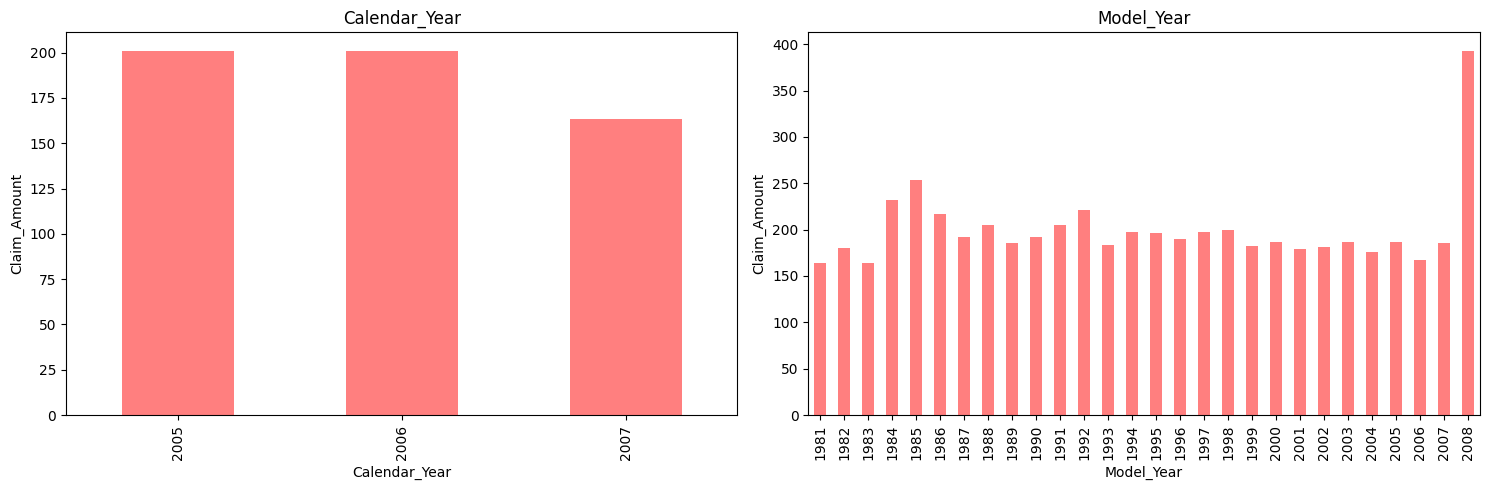

In [ ]:
# let's check their impacts on target feature
plt.subplots(1,2, figsize=(15,5))
for i,dcol in enumerate(discreat_features):
    plt.subplot(1,2,i+1)
    df_claimpred.groupby(dcol)['Claim_Amount'].mean().plot(kind='bar', alpha = 0.5, color='red')
    #df_claimpred.groupby(dcol)['Claim_Amount'].count().plot(kind='bar', alpha=0.2, color='blue')
    plt.title(f"{dcol}")
    plt.xlabel(dcol)
    #plt.yscale()
    plt.ylabel('Claim_Amount')
plt.tight_layout()
plt.show()

- It seems, in 'Calender_Year', average price for claim is same in years 2005 and 2006 compaired to 2007.
And in 'Model_Year', average prices are more for the model manufactured in 2008 compaired to manufactured before that.

*As we are considering data during the year 2005 to 2007, hence vehicle manufactured in 2008 should not be considered.*

Let's check how may such rows are there and their Calender_Year, where Model_Year is higher than Calendar_Year.

In [23]:
df_claimpred.query('Model_Year > Calendar_Year').count()

Household_ID      308
Vehicle           308
Calendar_Year     308
Model_Year        308
Blind_Make        308
Blind_Model       308
Blind_Submodel    308
Cat1              308
Cat2              308
Cat3              308
Cat4              308
Cat5              308
Cat6              308
Cat7              308
Cat8              308
Cat9              308
Cat10             308
Cat11             308
Cat12             308
OrdCat            308
Var1              308
Var2              308
Var3              308
Var4              308
Var5              308
Var6              308
Var7              308
Var8              308
NVCat             308
NVVar1            308
NVVar2            308
NVVar3            308
NVVar4            308
Claim_Amount      308
dtype: int64

There are 308 rows with such data, this could be misleading for further analysis.

### Now let's check distribution of all numerical features

In [ ]:
col = [ncol for ncol in num_features if ncol not in discreat_features+['Household_ID','Vehicle']]

Total number of numerical features are: 13


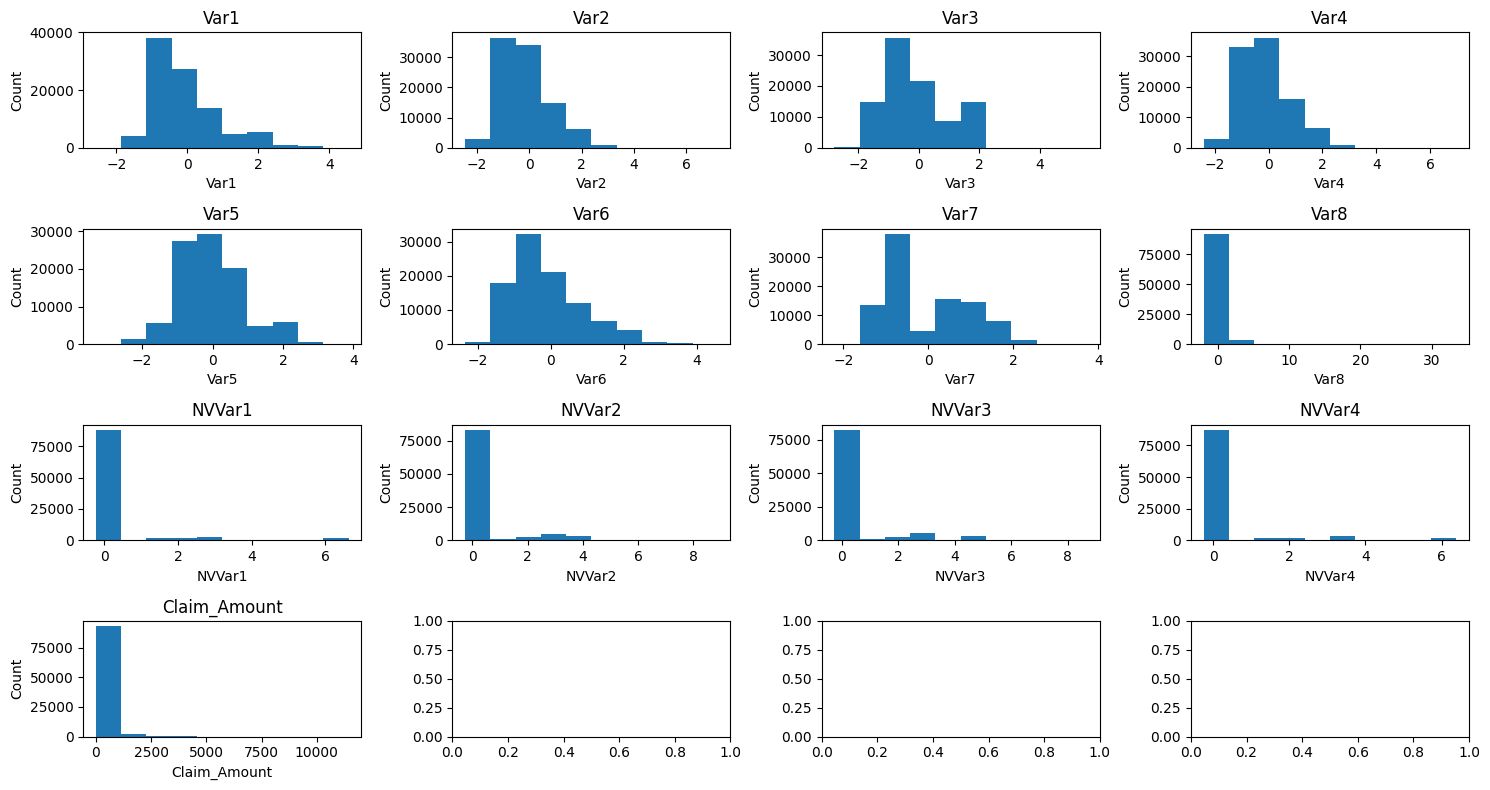

In [ ]:

print(f"Total number of numerical features are: {len(col)}")
plt.subplots(4,4, figsize=(15,8))
for i,c in enumerate(col):
    plt.subplot(4,4,i+1)
    plt.hist(df_claimpred[c])
    plt.title(c)
    plt.xlabel(c)
    plt.ylabel('Count')
plt.tight_layout()
plt.show()

As few data in a few columns is skewed. Hence checking its distribution by applying logarithmic transformations below.

Total number of numerical features are: 13


/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


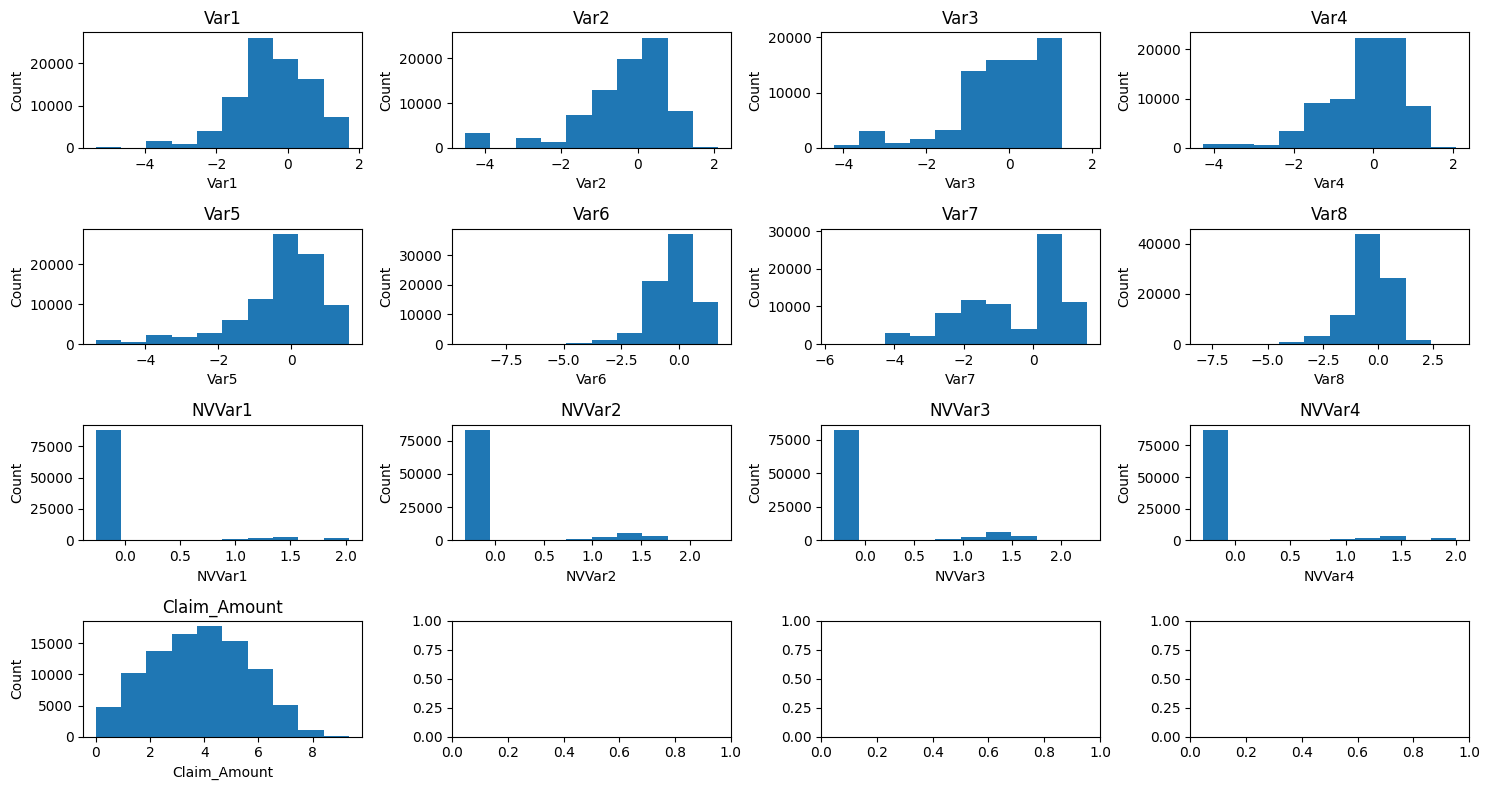

In [ ]:
col = [ncol for ncol in num_features if ncol not in discreat_features+['Household_ID','Vehicle']]
print(f"Total number of numerical features are: {len(col)}")
plt.subplots(4,4, figsize=(15,8))
for i,c in enumerate(col):
    plt.subplot(4,4,i+1)
    plt.hist(np.log(df_claimpred[c]+1))
    #sns.ecdfplot(np.log(df_claimpred[c]+1))
    plt.title(c)
    plt.xlabel(c)
    plt.ylabel('Count')
plt.tight_layout()
plt.show()

Checking relation between independent numerical features with target feature before and after applying logarithmic transformation.

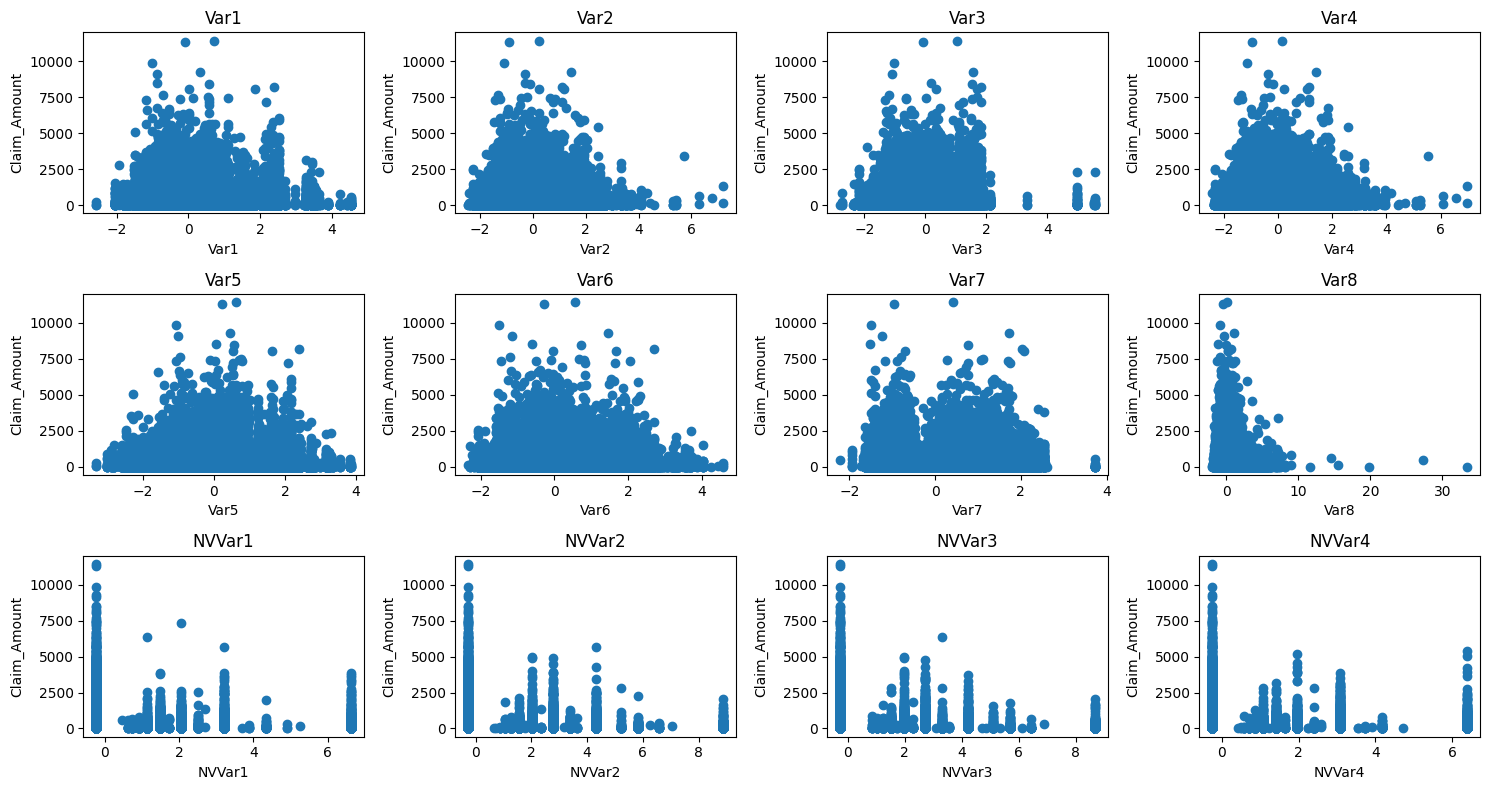

In [ ]:
# Before log
plt.subplots(3,4, figsize=(15,8))
for i,co in enumerate(col):
    if(co != 'Claim_Amount'):
        df_copy = df_claimpred.copy()
        plt.subplot(3,4,i+1)
        plt.scatter(df_copy[co], df_copy['Claim_Amount'])
        plt.title(co)
        plt.xlabel(co)
        plt.ylabel('Claim_Amount')
plt.tight_layout()
plt.show()

As per the above charts, it seems there is a relation between Var2 and Calim_Amount, Var4 and Calim_Amount, and Var8 and Calim_Amount.

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


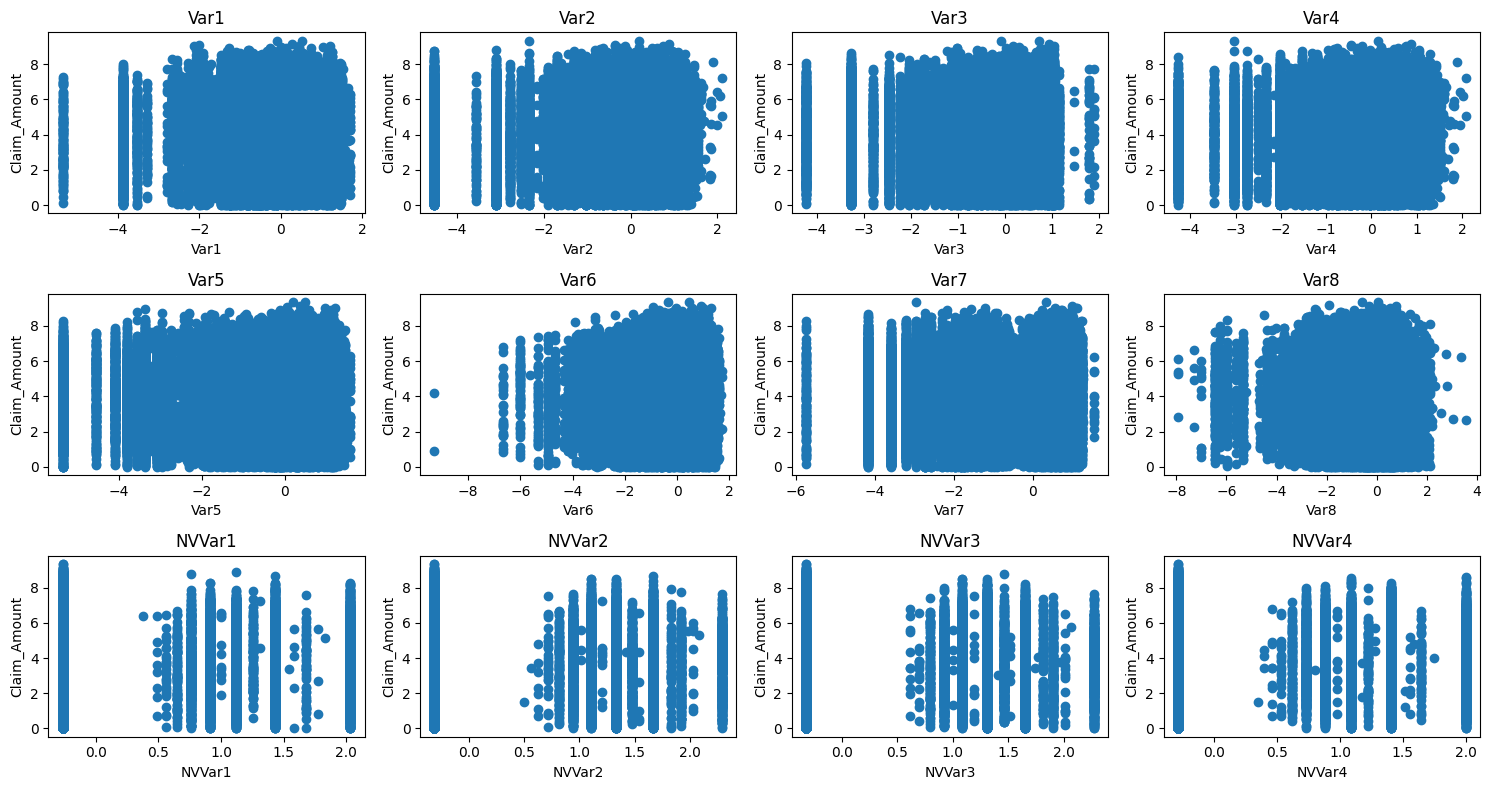

In [ ]:
# After log
plt.subplots(3,4, figsize=(15,8))
for i,co in enumerate(col):
    if(co != 'Claim_Amount'):
        df_copy = df_claimpred.copy()
        plt.subplot(3,4,i+1)
        df_copy[co] = np.log1p(df_copy[co])
        df_copy['Claim_Amount'] = np.log1p(df_copy['Claim_Amount'])
        plt.scatter(df_copy[co], df_copy['Claim_Amount'])
        plt.title(co)
        plt.xlabel(co)
        plt.ylabel('Claim_Amount')
plt.tight_layout()
plt.show()


After applying logarithmic transformation the relation between Var2 and Calim_Amount, Var4 and Calim_Amount, and Var8 and Calim_Amount is not visible, maybe log transformation has not transformed proportionally.

To understand more about numerical features, let's check outliers among them.

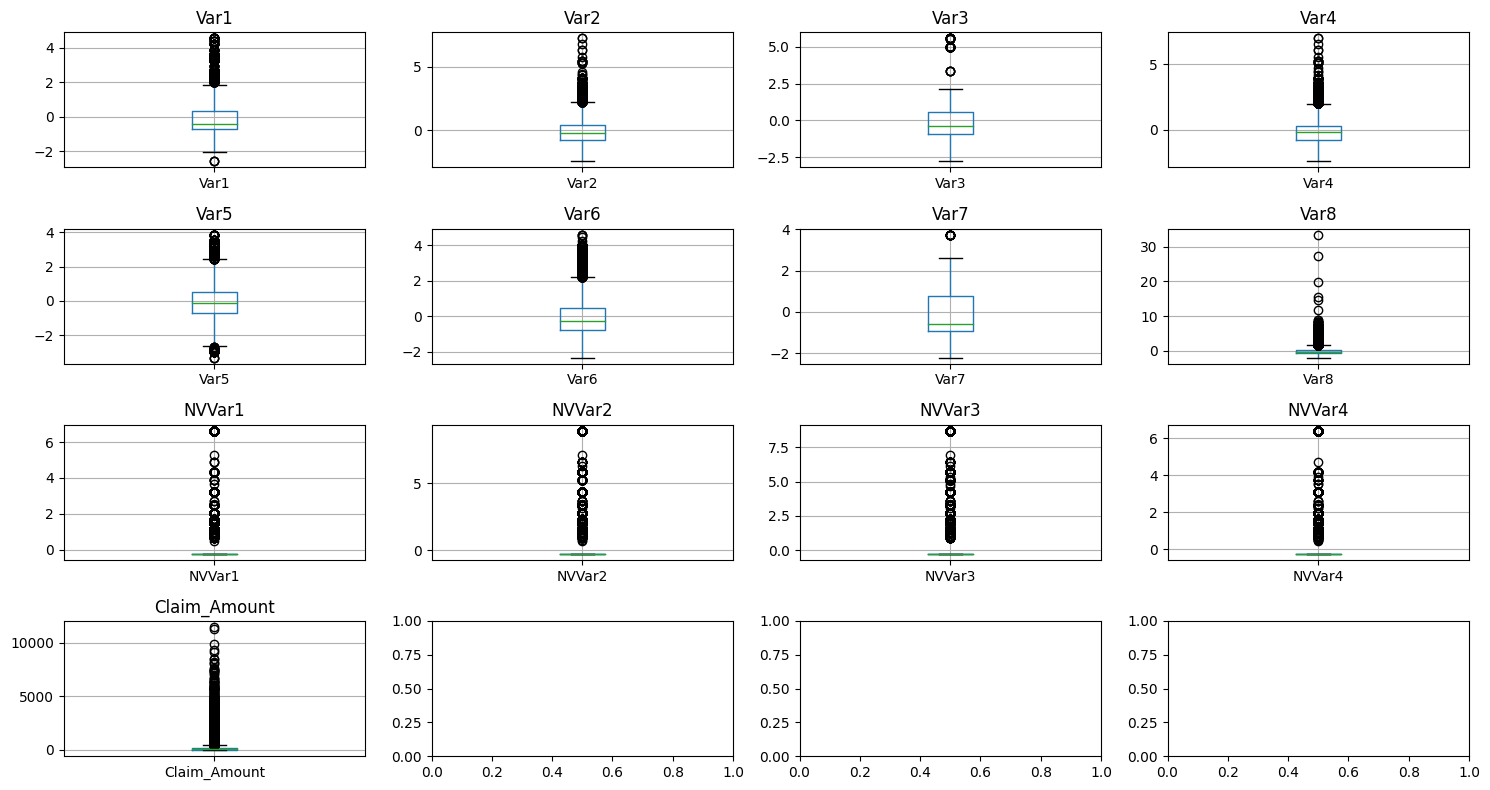

In [ ]:
# Before log
plt.subplots(4,4, figsize=(15,8))
for i,co in enumerate(col):
    df_copy = df_claimpred.copy()
    #df_copy[co] = np.log(df_copy[co]+1)
    plt.subplot(4,4,i+1)
    df_copy.boxplot(column=co)
    plt.title(co)
plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(uf

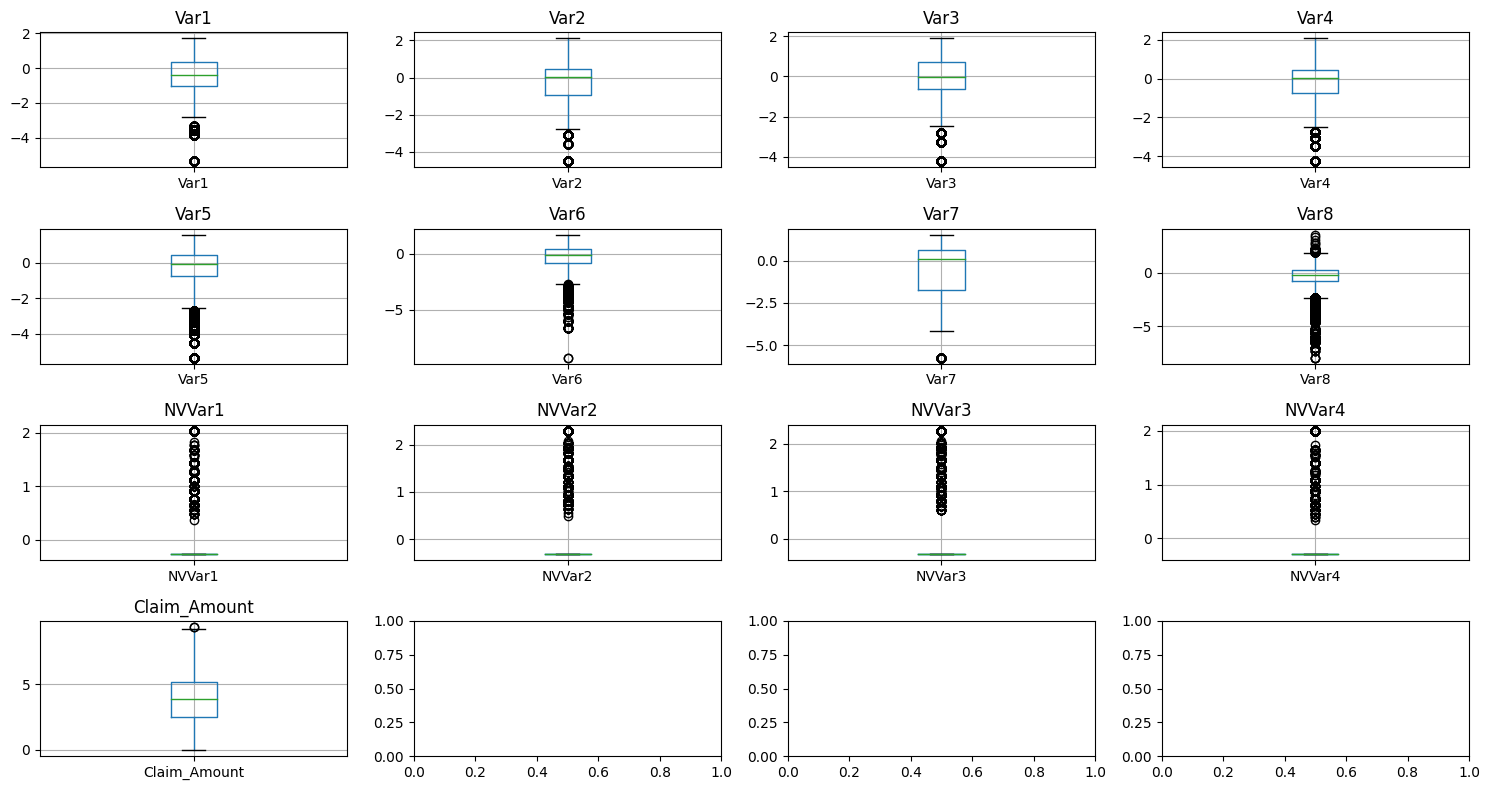

In [ ]:
# After log
plt.subplots(4,4, figsize=(15,8))
for i,co in enumerate(col):
    df_copy = df_claimpred.copy()
    df_copy[co] = np.log(df_copy[co]+1)
    plt.subplot(4,4,i+1)
    df_copy.boxplot(column=co)
    plt.title(co)
plt.tight_layout()
plt.show()

#### Observation for log transformation:
- After applying logarithmic transformations, it does not help in removing outliers except 'Var7' and 'Claim_Amount' features.
- As well as after transformation we are losing relationship information which was present before between target features and  Var2, Var4, and Var8 features.


To remove outliers without losing relationship data, we can try for power_transform with the 'yeo-johnson' method. Let's visualize data with this transform.

In [ ]:

df_copy = df_claimpred[col]
power = PowerTransformer( method='yeo-johnson')
df_copy = power.fit_transform(df_copy)

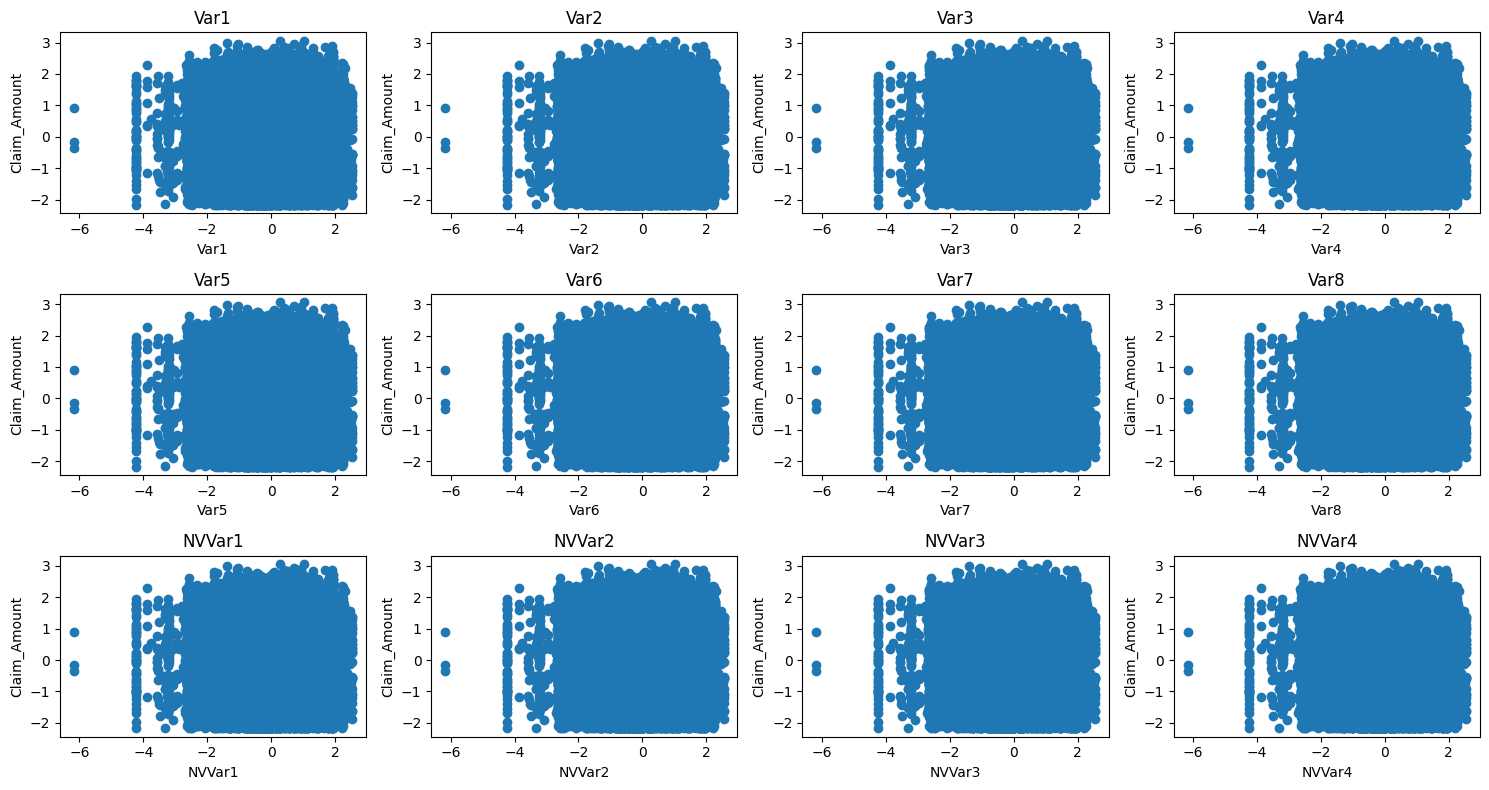

In [ ]:
from sklearn.preprocessing import PowerTransformer

plt.subplots(3,4, figsize=(15,8))
for i,co in enumerate(col):
    if(i != 12):
        plt.subplot(3,4,i+1)
        plt.scatter(df_copy[:,0], df_copy[:,12])
        plt.title(co)
        plt.xlabel(co)
        plt.ylabel('Claim_Amount')
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler

df_copy = df_claimpred[col]
robust = MinMaxScaler()
df_copy = robust.fit_transform(df_copy)

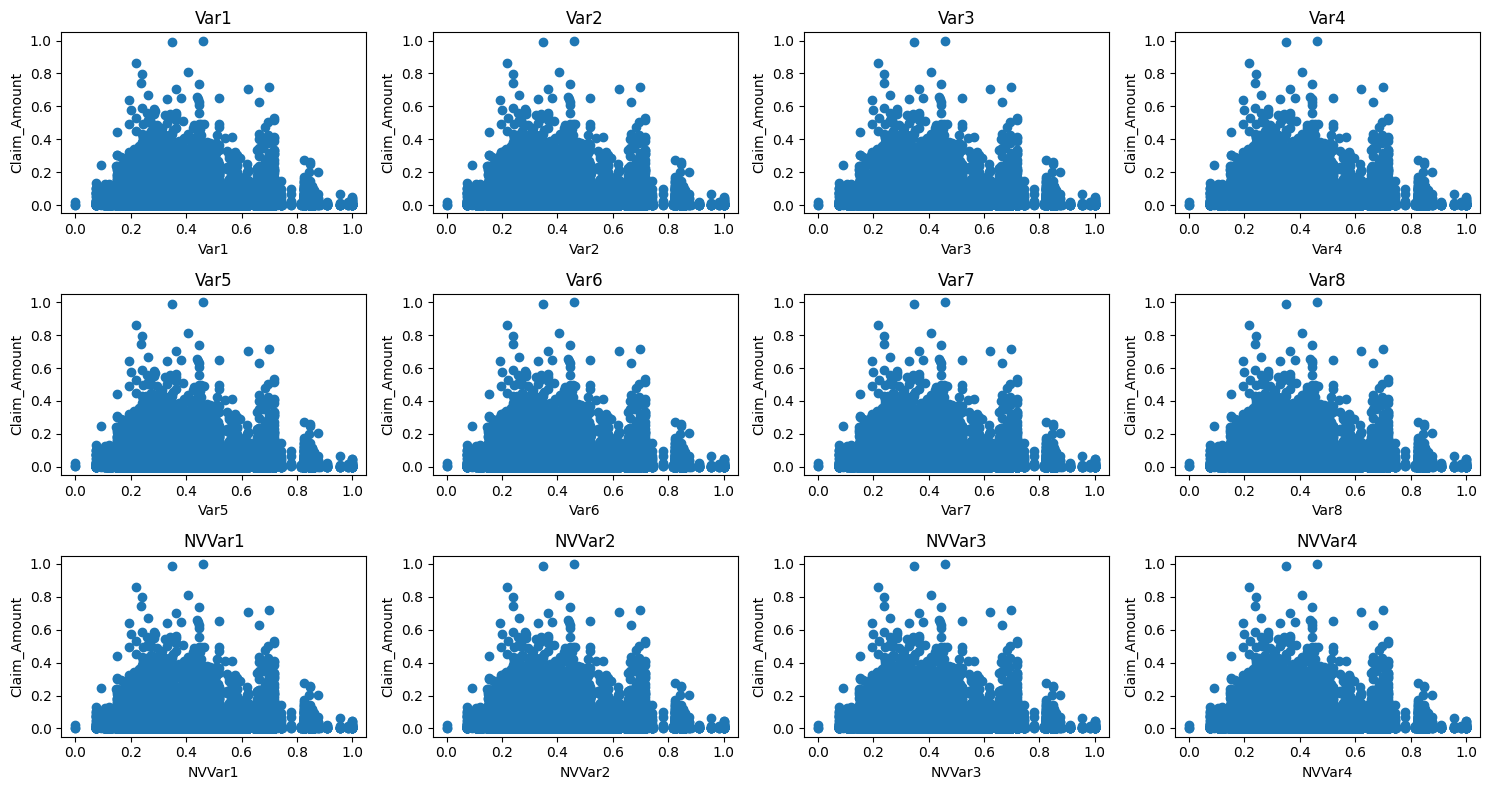

In [ ]:
from sklearn.preprocessing import PowerTransformer

plt.subplots(3,4, figsize=(15,8))
for i,co in enumerate(col):
    if(i != 12):
        plt.subplot(3,4,i+1)
        plt.scatter(df_copy[:,0], df_copy[:,12])
        plt.title(co)
        plt.xlabel(co)
        plt.ylabel('Claim_Amount')
plt.tight_layout()
plt.show()


It seems power_transform also not able to save relationship data after transformation. So it is better to not use any transformer.

#### Categorical features
Now we can move to analyzing Categorical features.


In [ ]:
categorical_features = df_claimpred.select_dtypes('object').columns

for ccol in categorical_features:
    print(f"{ccol} has {len(df_claimpred[ccol].unique())}")

df_claimpred[categorical_features].head()

Blind_Make has 56
Blind_Model has 898
Blind_Submodel has 1825
Cat1 has 11
Cat2 has 4
Cat3 has 7
Cat4 has 4
Cat5 has 4
Cat6 has 6
Cat7 has 5
Cat8 has 4
Cat9 has 2
Cat10 has 4
Cat11 has 7
Cat12 has 7
OrdCat has 8
NVCat has 15


,Blind_Make,Blind_Model,Blind_Submodel,Cat1,Cat2,Cat3,Cat4,Cat5,Cat6,Cat7,Cat8,Cat9,Cat10,Cat11,Cat12,OrdCat,NVCat
Row_ID,,,,,,,,,,,,,,,,,
48,X,X.38,X.38.0,C,C,A,C,A,B,?,A,B,A,F,B,4,N
102,BH,BH.18,BH.18.5,B,C,F,A,A,B,C,A,B,A,F,C,2,B
155,AJ,AJ.48,AJ.48.1,D,C,A,?,?,D,?,A,B,A,B,D,5,H
212,AR,AR.41,AR.41.1,B,?,A,A,A,C,C,A,B,B,A,B,2,H
352,AJ,AJ.76,AJ.76.2,D,?,C,?,?,E,?,A,B,B,A,C,5,M


#### In features like 'Blind_Make', 'Blind_Model','Blind_Submodel' has hierarchical relationship i.e. each blind_make has multiple blind_model and each blind_model has multiple blind_subnodel.

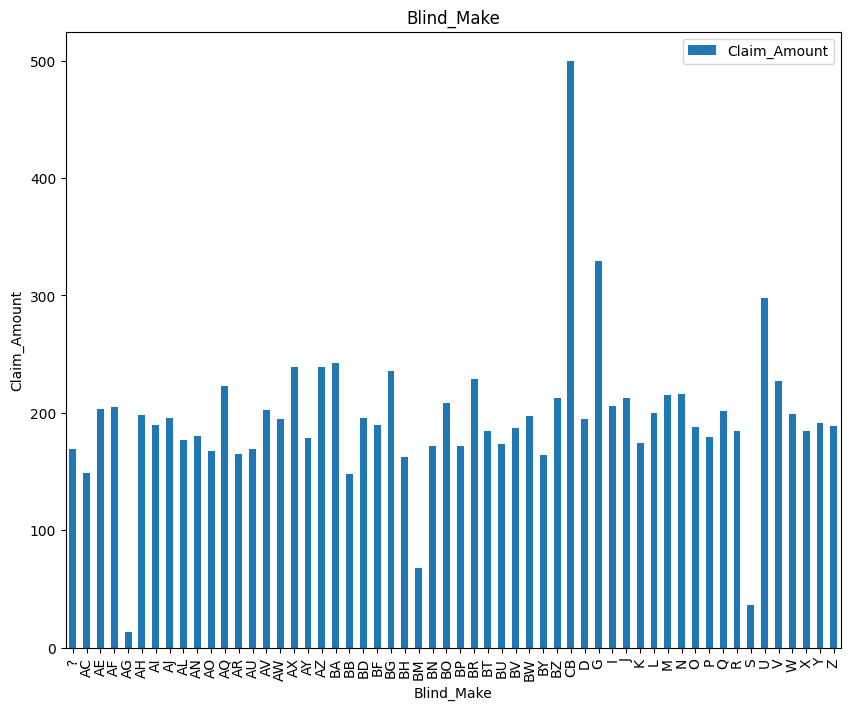

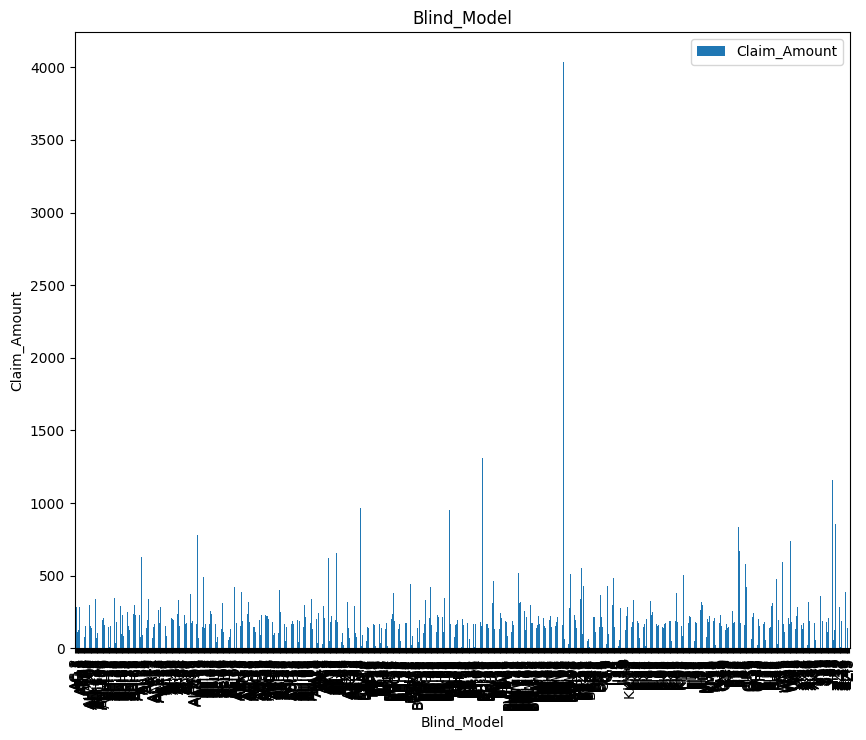

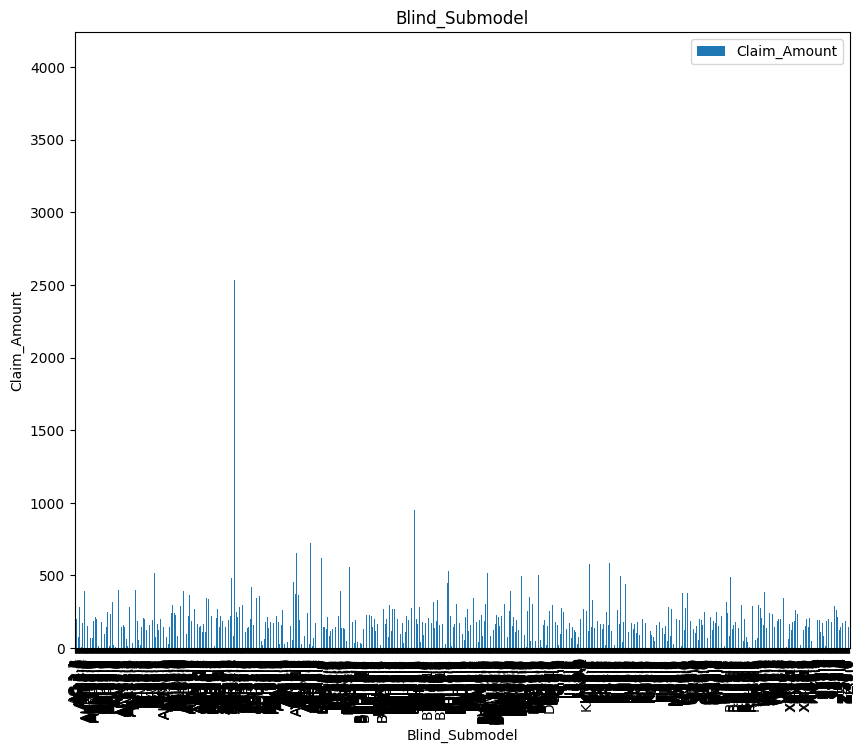

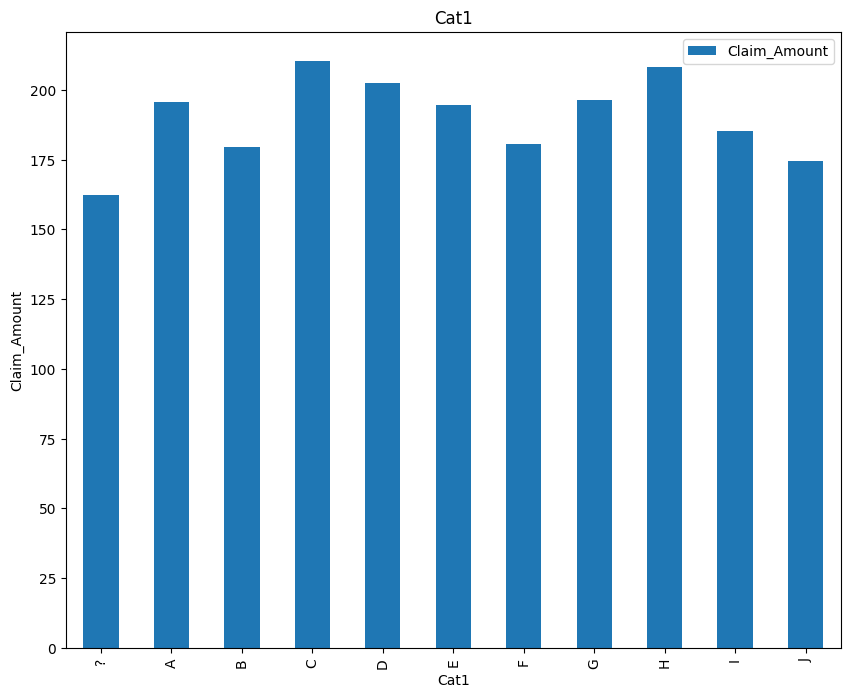

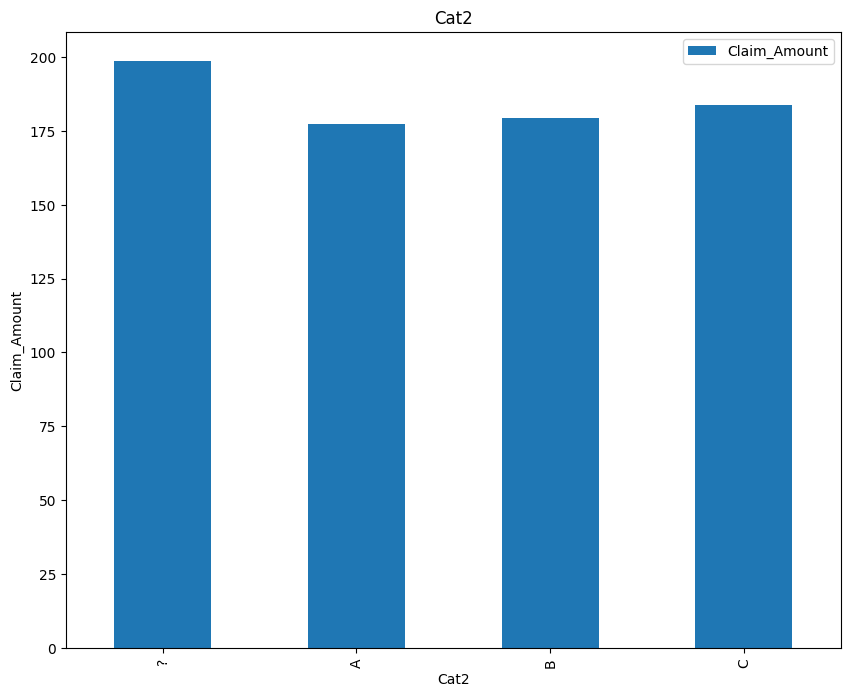

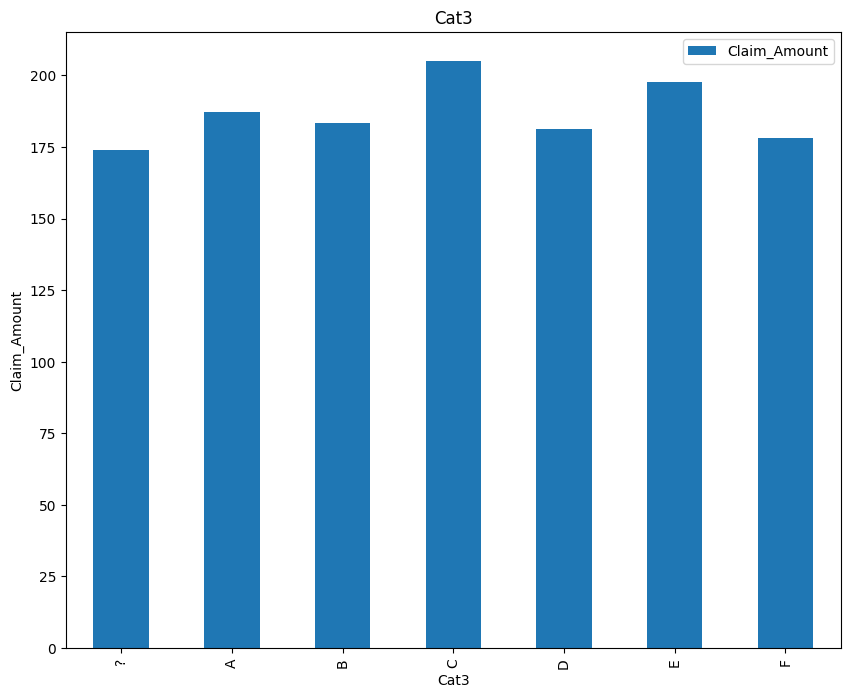

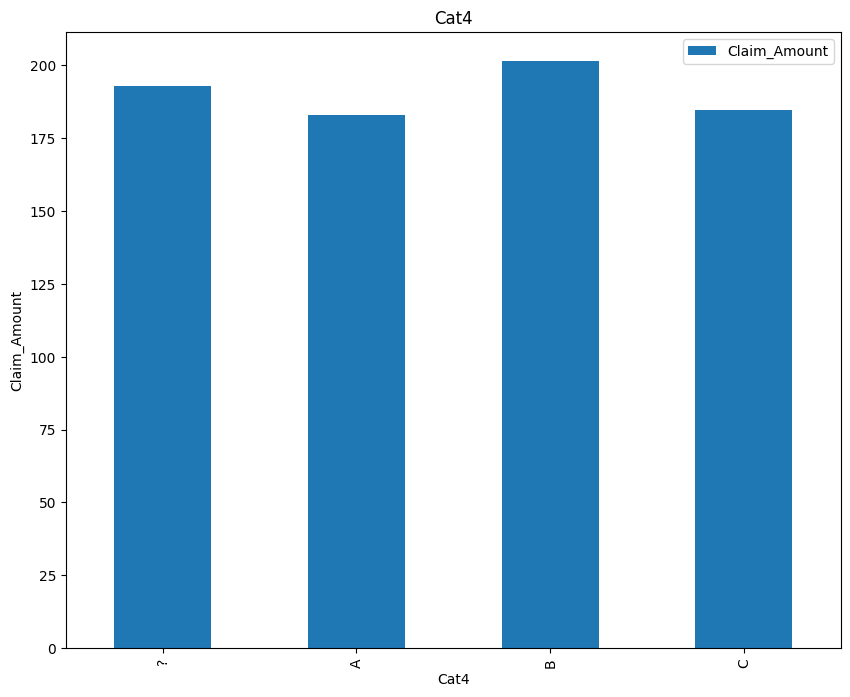

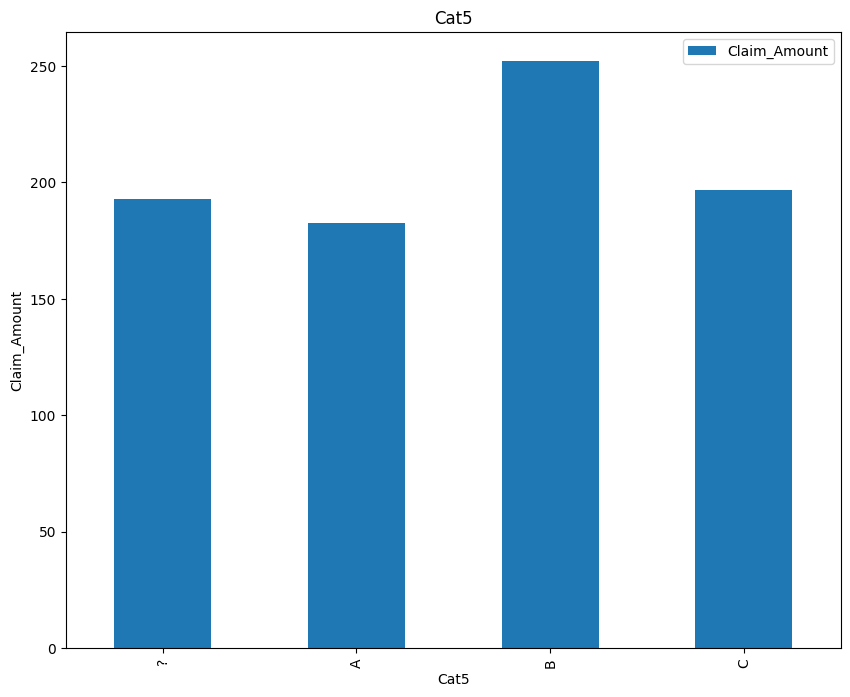

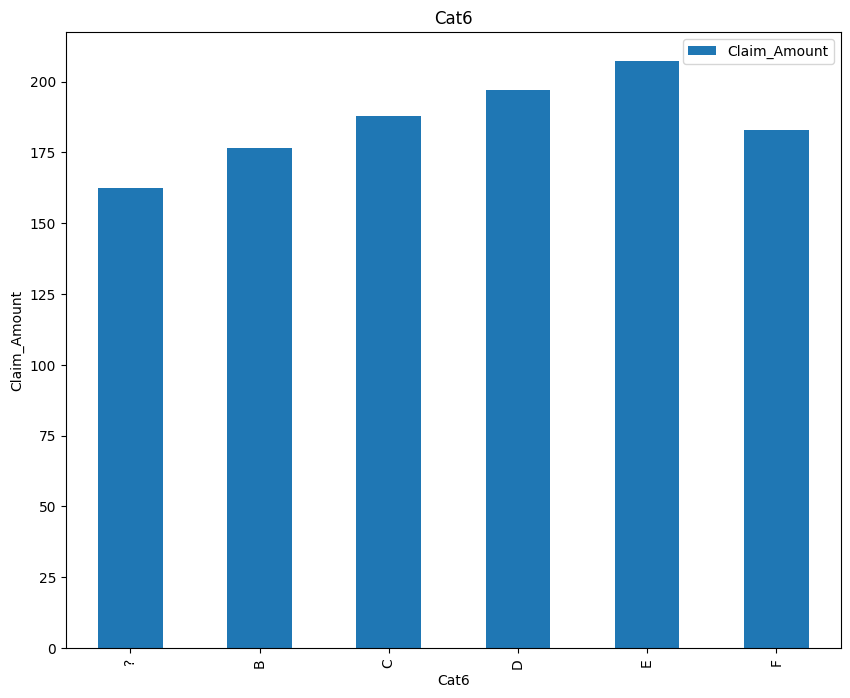

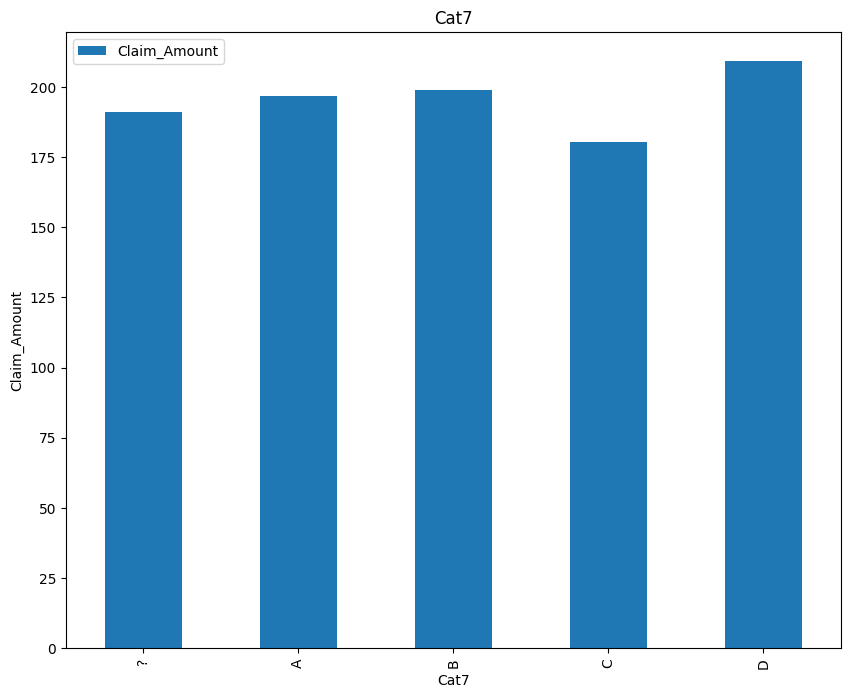

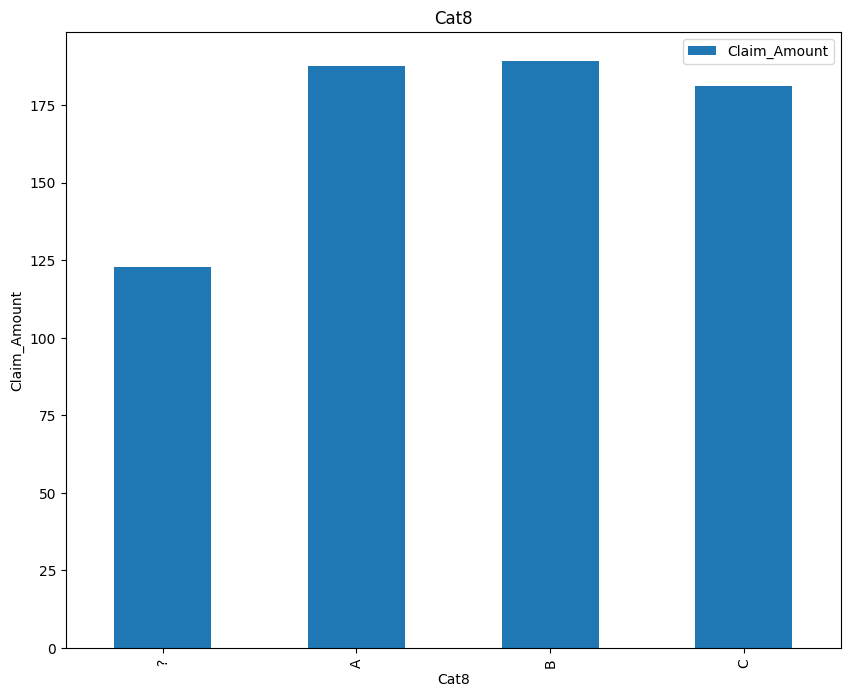

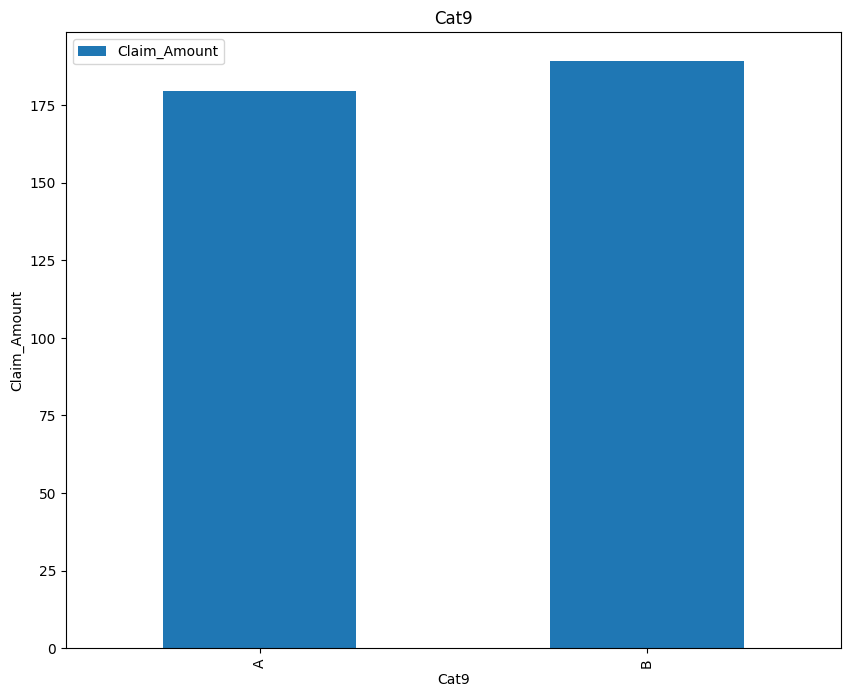

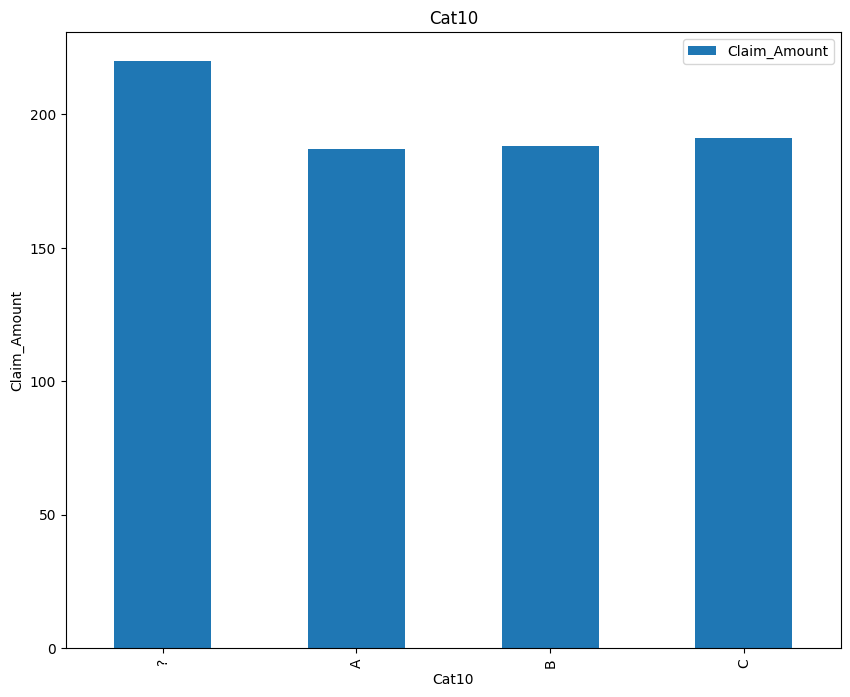

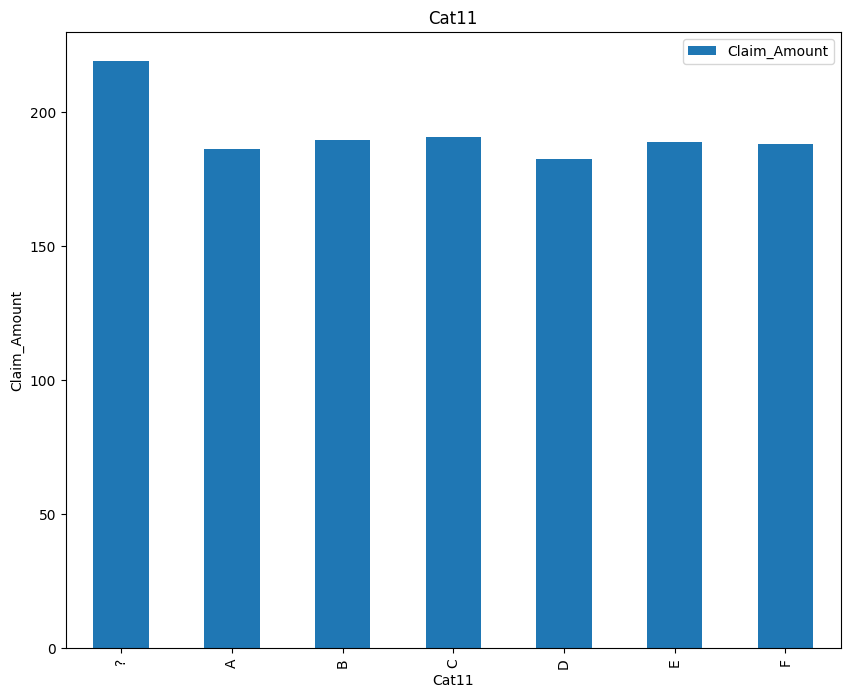

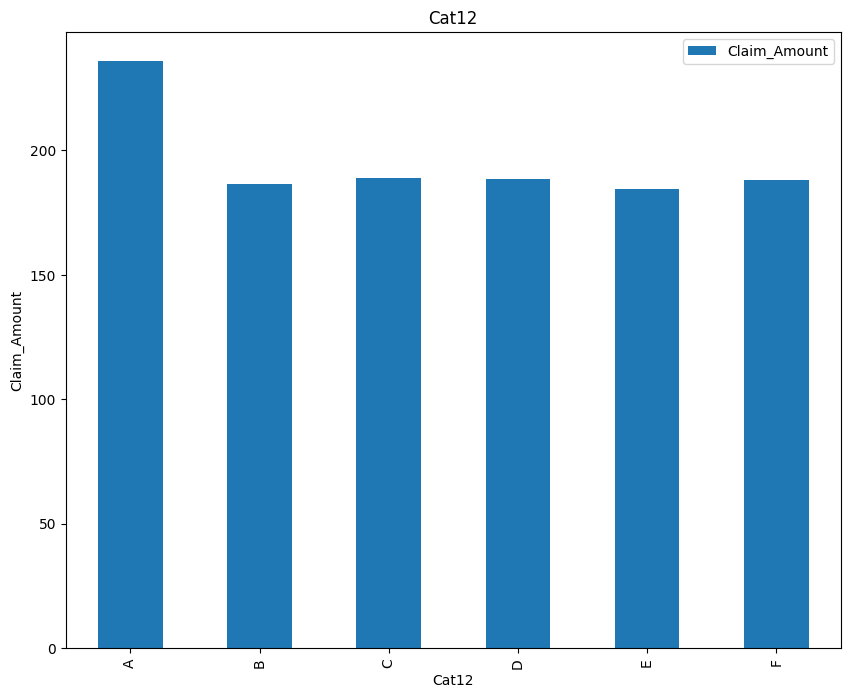

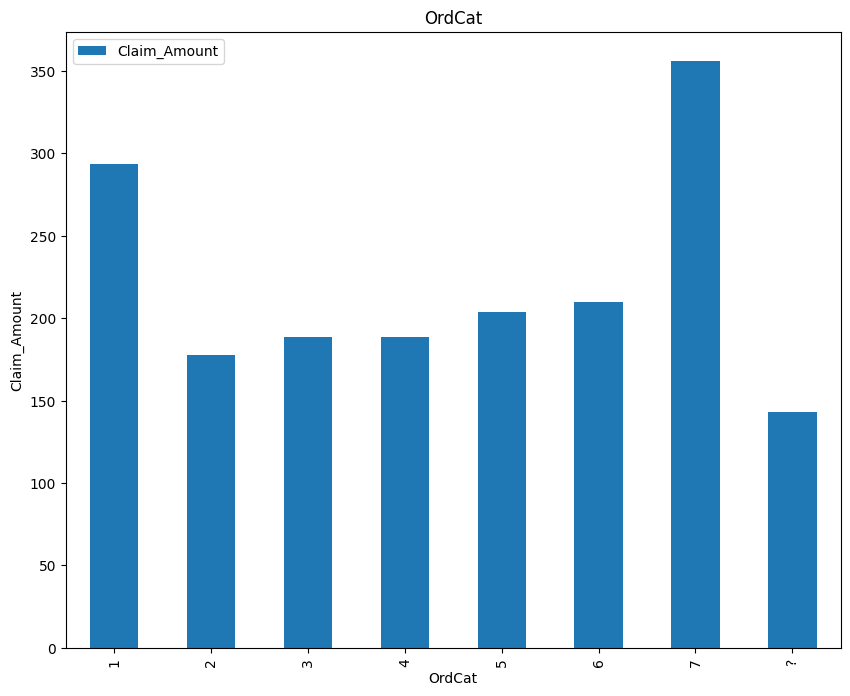

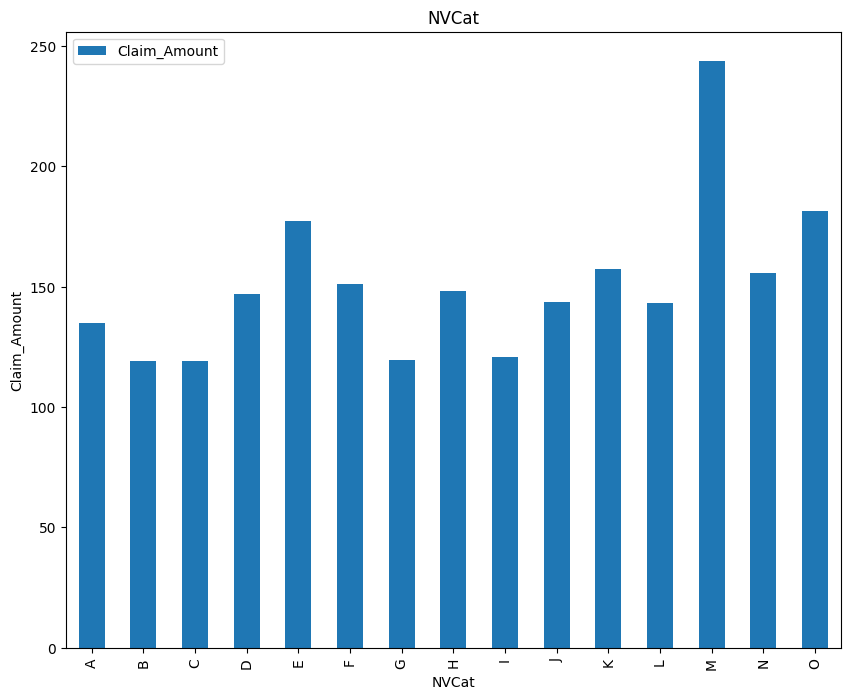

In [ ]:
for ccol in categorical_features:
    plt.figure(figsize=(10,8))
    df_claimpred.groupby(ccol)['Claim_Amount'].mean().plot(kind='bar')
    plt.title(ccol)
    plt.xlabel(ccol)
    plt.ylabel('Claim_Amount')
    plt.legend()
    plt.show()


#### Check for outliers

In [ ]:
num_cols = list(df_claimpred.select_dtypes('number').columns)

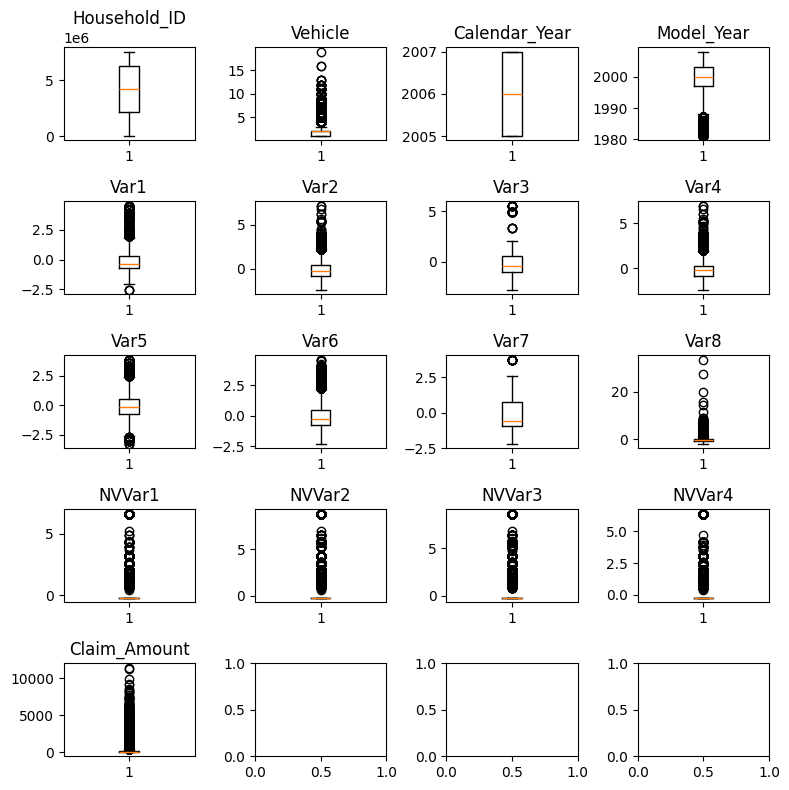

In [ ]:
import seaborn as sns
#plt.figure(8,8)
plt.subplots(5,4, figsize=(8,8))
for i, col in enumerate(num_cols):
    plt.subplot(5,4,i+1)
    plt.boxplot(df_claimpred[col])
    plt.title(col)
    plt.tight_layout()
plt.show()

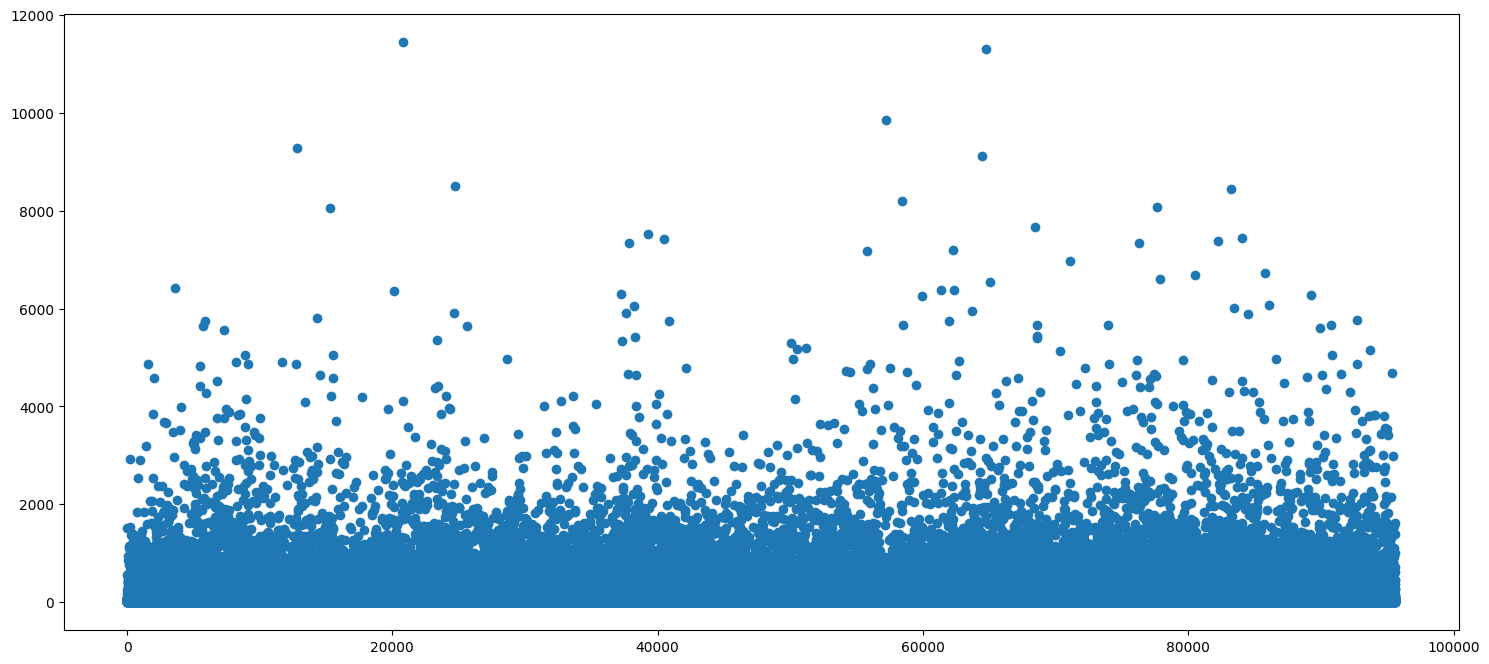

In [ ]:
plt.figure(figsize=(18,8))
plt.scatter(list(range(0,len(df_claimpred['Claim_Amount']))),df_claimpred['Claim_Amount'])
plt.show()